# SVM을 훈련시키보자

In [9]:
###> 표, 경계 시각화, 배열/행렬 처리, 모델 및 학습/테스트 구분 용 라이브러리 로드

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd

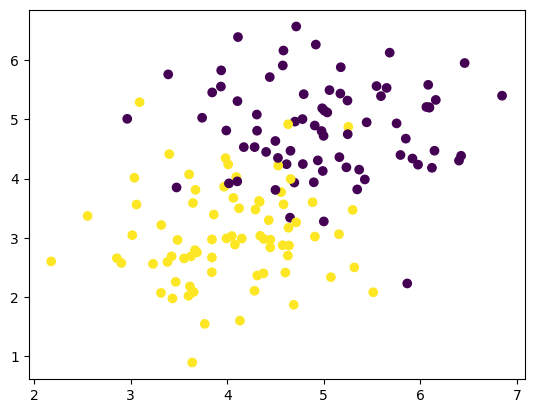

In [10]:
# Generate data

# Configuration options
###> 전체 샘플 개수 지정 및 두개의 중심좌표를 군집,중심점으로 지정, 클래스 군집 개수 설정
num_samples_total = 150
cluster_centers = [(5,5), (4,3)]
num_classes = len(cluster_centers)


# Generate data
###> 설정한 중심점 및 샘플 수 기반 2차원 데이터(X)와 레이블(y) 생성 -> 생성된 점들을 클래스별 색깔을 다르게 하여 시각화 진행
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [11]:
###> 선형 SVM 분류기 생성 -> 생성한 데이터(X, y)로 학습 진행

# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear', C=1, degree=1)

# Fit the data to the SVM classifier
svm = svm.fit(X, y)


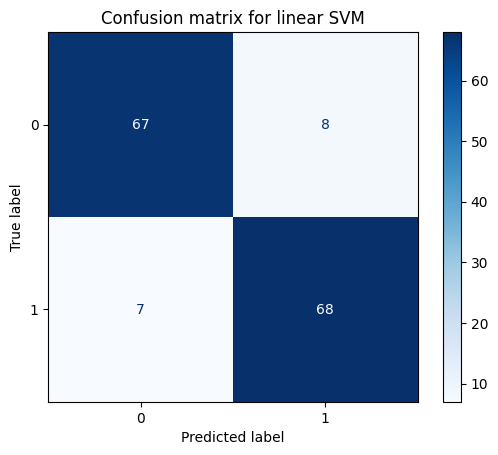

In [12]:
# Evaluate by means of a confusion matrix
###> 학습된 SVM 모델의 예측 결과를 혼동 행렬로 시각화하여 분류 성능 평가 진행
matrix = ConfusionMatrixDisplay.from_estimator(svm, X, y,
                                               cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

###> 0을 0으로 맞춘 개수 67, 1을 1로 맞춘 개수 68
###> 0을 1으로 확인한 개수 8, 1을 0으로 확인한 개수 7
###> 약간의 오분류 존재

In [13]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy:.4f}')

###> 평가시 0.90.. 으로 90%의 정확도를 보여주고 있음

Model accuracy: 0.9000


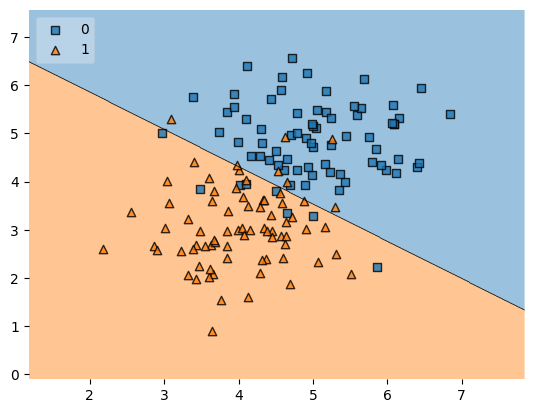

In [14]:
# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

###> SVM이 학습한 선형 결정 경계를 시각화하여,두 클래스(0과 1)가 어떻게 구분되는지 보여주는 그래프로 0은 파랑, 1은 빨강으로 표시하였다.
###> 육안으로 확인 시 1위치에 0이 8개이며, 0위치에 1이 6개, 중간선 사이 2개 존재하나, 1개만 오탐한 것을 확인할 수 있다.

# 모델을 평가하려면, 데이터를 어떻게 나누지?

In [16]:
# Split into training and testing data
###> 전체 데이터를 학습용 80%, 테스트용 20%로 나누어 모델 학습과 성능 평가에 사용할 데이터셋을 분리함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  120
no of testing data:  30


In [17]:
###> 학습용 데이터로 선형 SVM 모델을 학습시키고,
###> 학습 데이터와 테스트 데이터 각각에 대한 예측 및 정확도를 계산함

# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')

Model training accuracy: 0.9083
Model testing accuracy: 0.9333


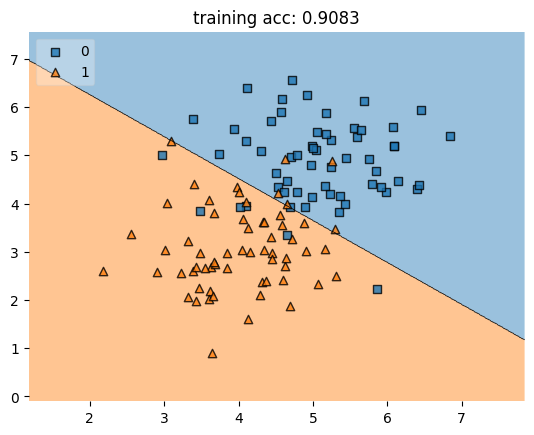

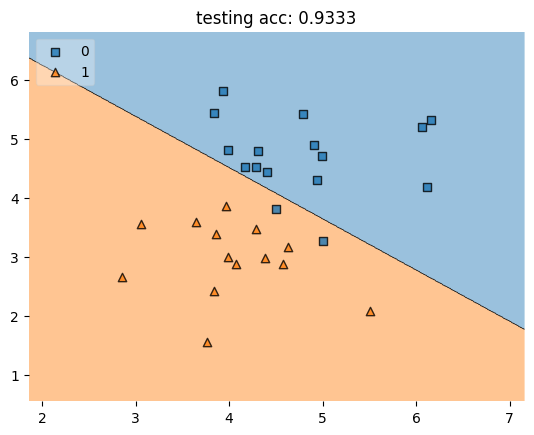

In [18]:
###> 학습 데이터와 테스트 데이터 각각에 대해 SVM이 학습한 결정 경계를 시각화하고, 해당 데이터셋의 정확도를 그래프 제목으로 표시함

# Plot decision boundary for training data
plot_decision_regions(X_train, y_train, clf=svm, legend=2)
plt.title(f'training acc: {train_accuracy:.4f}')
plt.show()

# Plot decision boundary for testing data
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.title(f'testing acc: {test_accuracy:.4f}')
plt.show()

###> 학습 데이터는 90.83% 정확도를 보이고,테스트 데이터는 93.33퍼센트를 보이고 있다.
###> 과적합이 아닌 일반화가 잘 된 케이스로 확인된다.

# 모델이 정말로 견고한지(Robust) 확인해보자!!!
## 교차 검증(Cross Validation).

교차 검증은 데이터를 k-폴드(k-fold)로 나누는 것입니다. 여기서는 5-폴드(5-fold)를 예시로 듭니다. <br>

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV.png" width="512"/>

<br>

**첫 번째 반복(Iteration)**,
* 처음 4개 세트의 데이터를 학습용(파란 상자)으로 사용하고, 마지막 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_1 (validation accuracy_1)*을 얻게 됩니다. <br>

**두 번째 반복**,
* 1, 2, 3, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 4번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_2 (validation accuracy_2)*를 얻게 됩니다. <br>

**세 번째 반복**,
* 1, 2, 4, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 3번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_3 (validation accuracy_3)*을 얻게 됩니다. <br>

**5번째 반복까지 진행하면, 총 5개의 검증 정확도를 얻게 됩니다. <br>
평균 정확도를 계산하여 모델의 성능을 평가할 수 있습니다.**

In [19]:
# K-Fold 교차검증을 사용하여 데이터를 5개로 나누고, Fold별로 SVM을 학습 → 검증하여 train/validation 정확도 확인함

from sklearn.model_selection import KFold
# refer to https://scikit-learn.org/stable/modules/cross_validation.html

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  print('Fold ', n)
  print('no of training data: ', len(X_train))
  print('no of validation data: ', len(X_val))

  # Create the SVM with linear kernel
  svm = SVC(random_state=42, kernel='linear')

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_val = svm.predict(X_val)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  val_accuracy = accuracy_score(y_val, y_pred_val)
  print(f'Model training accuracy: {train_accuracy:.4f}')
  print(f'Model testing accuracy: {val_accuracy:.4f}')

  n += 1
  train_acc.append(train_accuracy)
  val_acc.append(val_accuracy)
  print('------------------------------------')

print(f'Validation Accuracy: {np.average(train_acc):.4f} +- {np.std(val_acc):.4f}')

###> Fold 1: Train 0.9167 / Val 0.8667 → 정상으로 보인다... (큰 격차로 보이지 않음)
###> Fold 2: Train 0.8917 / Val 0.9667 → 오히려 테스트에서 더 좋은 수치로 나타난다.
###> 이후로는 비슷하다. 전반적으로 과적합이 오지 않고 일반화가 잘 된 것으로 보인다.

Fold  1
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9167
Model testing accuracy: 0.8667
------------------------------------
Fold  2
no of training data:  120
no of validation data:  30
Model training accuracy: 0.8917
Model testing accuracy: 0.9667
------------------------------------
Fold  3
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9083
Model testing accuracy: 0.8667
------------------------------------
Fold  4
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9167
Model testing accuracy: 0.9000
------------------------------------
Fold  5
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9000
Model testing accuracy: 0.9000
------------------------------------
Validation Accuracy: 0.9067 +- 0.0365


# 하이퍼파라미터 튜닝 (Hyperparameter Tuning)

우리는 튜닝 가능한 파라미터들이 있다는 것을 알고 있습니다. 예를 들어, 커널(선형 / 다항식 / rbf)이나 C(규제항)를 선택하는 것 등입니다. 최적의 하이퍼파라미터를 결정하기 위해, 우리는 교차 검증(Cross Validation) 개념을 사용하여 최적의 값을 찾는 grid_search를 사용합니다.


<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV_test.png" width="512"/>

<br>

**데이터를 학습(Train), 검증(Validation), 테스트(Test) 세트로 분할**

**첫 번째 반복(Iteration)**,
* 처음 4개 세트의 데이터를 학습용(파란 상자)으로 사용하고, 마지막 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키되, ***다양한 하이퍼파라미터 조합을 사용하여*** 학습하고 검증 데이터에 대해 테스트합니다.
* 예를 들어 5가지 하이퍼파라미터 조합을 시도했다면, 5개의 모델과 5개의 검증 정확도를 얻게 됩니다.
* 가장 높은 검증 정확도를 보이는 모델이 선택됩니다.
* *검증 정확도_1 (validation accuracy_1)*과 *하이퍼파라미터 세트_1 (hyperparameter_1)*을 얻게 됩니다. <br>

**두 번째 반복**,
* 1, 2, 3, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 4번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키되, ***다양한 하이퍼파라미터 조합을 사용하여*** 학습하고 검증 데이터에 대해 테스트합니다.
* 예를 들어 5가지 하이퍼파라미터 조합을 시도했다면, 5개의 모델과 5개의 검증 정확도를 얻게 됩니다.
* *검증 정확도_2 (validation accuracy_2)*와 *하이퍼파라미터 세트_2 (hyperparameter_2)*를 얻게 됩니다. <br>


**5번째 반복까지 진행하면, 총 5개의 검증 정확도를 얻게 됩니다. <br>
가장 높은 검증 정확도를 제공하는 하이퍼파라미터 세트가 선택됩니다. <br>
선택된 최적의 하이퍼파라미터를 사용하여 모든 학습 + 검증 데이터를 합친 데이터로 모델을 재학습(Retrain)시킵니다. <br>
테스트 세트에서 최종 모델을 평가합니다**

### 앞서 설명한 절차를 수행하는 GridSearchCV를 사용할 수 있습니다.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/iris.PNG" width="620"/>

이 예제에서는 iris(붓꽃) 데이터를 사용합니다.
X는 4개의 변수를 가집니다.
1. 꽃받침 길이 (sepal length in cm)
2. 꽃받침 너비 (sepal width in cm)
3. 꽃잎 길이 (petal length in cm)
4. 꽃잎 너비 (petal width in cm)

y는 3개의 출력을 가집니다.
* 0 -- Iris Setosa
* 1 -- Iris Versicolour
* 2 -- Iris Virginica

In [20]:
###> Iris 데이터셋을 불러오고, 모델 학습/평가를 위해 전체 데이터를 학습용(80%)과 테스트용(20%)으로 분리 진행함

from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

# use iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))


no of training data:  120
no of testing data:  30


In [21]:
###> SVM의 kernel(선형/비선형)과 C 값에 대해 여러 조합을 시험해 보고, 교차검증(cv=4)을 통해 가장 성능이 좋은 하이퍼파라미터를 찾는 단계임

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

###> Best: linear kernel + C = 1 평균 약 0.96..., 6개 중 가장 높음.
###> linear(0.1), rbf(1), linear(10), rbf(10) 평균 0.95...로 거의 비슷함.
###> rbf + C=0.1 평균 0.89... Fold간 편차가 상대적으로 커보임

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000636,0.000144,0.000374,0.000048,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
1,0.000881,0.000289,0.000457,0.000074,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.966667,0.766667,0.933333,0.900000,0.891667,0.075920,6
2,0.000620,0.000050,0.000419,0.000069,1.0,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.966667,0.933333,0.966667,0.966667,0.023570,1
3,0.000915,0.000090,0.000567,0.000092,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
4,0.000658,0.000039,0.000430,0.000072,10.0,linear,"{'C': 10, 'kernel': 'linear'}",0.966667,0.933333,0.933333,1.000000,0.958333,0.027639,5
5,0.000797,0.000102,0.000417,0.000060,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,0.966667,0.933333,0.966667,0.958333,0.014434,2


In [22]:
# Retrain the model with the best hyperparameter
best_param = clf.best_params_
print('best param: ', best_param)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

best param:  {'C': 1, 'kernel': 'linear'}


,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
# GridSearchCV로 선택된 최적 SVM 모델을 테스트 데이터에 적용하여, 교차검증 성능(mean_test_score)과 실제 테스트 정확도를 비교함

# Evaluate model performance using test data

# Generate predictions
y_pred = svc.predict(X_test)

# Evaluate by means of accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Model CV accuracy: ', results['mean_test_score'].iloc[2])
print('Model testing accuracy: ', test_accuracy)
print('Parameter used:', best_param)

###> 교차검증에서 평균 정확도는 약 0.967였고, 실제 테스트 데이터에서는 교차 검증에서 확인했던 내용을 맞췄다.
###> 최적 파라미터는 교차검증과 마찬가지로 kernel='linear', C=1 이다.

Model CV accuracy:  0.9666666666666668
Model testing accuracy:  1.0
Parameter used: {'C': 1, 'kernel': 'linear'}


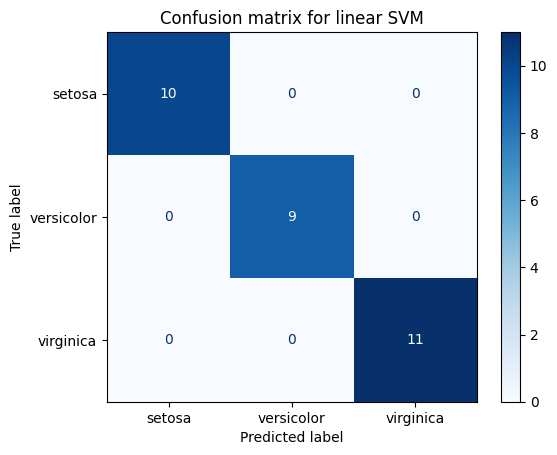

In [24]:
###> 테스트 데이터에 대해 SVM 모델의 예측 결과를 혼동행렬로 시각화하여 각 꽃 종류(setosa, versicolor, virginica)를 얼마나 정확히 분류했는지 확인함

# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test,
                              cmap=plt.cm.Blues,
                               display_labels=iris.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

###> setosa → 전부 setosa로 맞춤 (10/10)
###> versicolor → 전부 versicolor로 맞춤 (9/9)
###> virginica → 전부 virginica로 맞춤 (11/11)

###> 오분류가 없는 상태로 출력되었음.
###> 테스트 정확도 1과 동일한 결과로 출력되었음.
###> 테스트 데이터에서 3개 클래스 전부 오류 없이 분류된 상태에서, SVM(linear, C=1)이 iris 데이터에 매우 적합한 모델인 것을 나타내고 있음

In [25]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

###> 위 설명에 대한 수치 출력임. 
###> 내용은 위 내용과 동일함.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 최종과제: 유방암 데이터를 가장 잘 분류하는 SVM 모델 학습

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [28]:
bc = datasets.load_breast_cancer()
X = pd.DataFrame(data=bc.data)
y = bc.target

In [29]:
from sklearn.model_selection import train_test_split

# 학습용 80%, 테스트용 20%로 분할 진행

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Train:", len(X_train), "Test:", len(X_test))


Train: 455 Test: 114


In [30]:
# 선형 SVM 기본 모델 생성 후 예측한 내용 및 정확도 출력 진행

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

# 여기서 예측 진행함. predict 함수 1줄로 예측 되는건 편하네요 ㅎㅎ ㅋㅋㅋ
y_pred = svc.predict(X_test)

print("Basic SVM test accuracy:", accuracy_score(y_test, y_pred))


Basic SVM test accuracy: 0.956140350877193


Best params: {'C': 10, 'kernel': 'linear'}
Best CV accuracy: 0.9626610774724422
Test accuracy using best model: 0.9649122807017544


<Figure size 600x600 with 0 Axes>

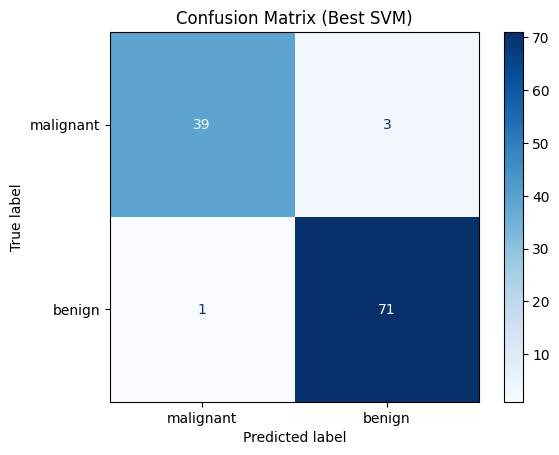

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}

clf = GridSearchCV(SVC(), parameters, cv=4)
clf.fit(X_train, y_train)

best_param = clf.best_params_
print("Best params:", best_param)
print("Best CV accuracy:", clf.best_score_)

best_model = clf.best_estimator_
y_pred_best = best_model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred_best)
print("Test accuracy using best model:", test_acc)

plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=bc.target_names)
plt.title("Confusion Matrix (Best SVM)")
plt.show()


In [ ]:
여러 SVM 설정(kernel, C)을 시험해서 가장 좋은 모델을 자동으로 찾고, 그 모델이 테스트 데이터에서 얼마나 잘 맞는지 확인한 후 혼동행렬로 시각화한 구성이다.

* 실험할 SVM 파라미터 후보들 (kernel 2종류, C 3종류) 지정 (parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]})
* 6가지 조합을 4-Fold 교차검증으로 성능 비교하는 GridSearchCV 생성 (clf = GridSearchCV(SVC(), parameters, cv=4))
* 모든 파라미터 조합으로 학습·검증을 수행 -> 최적 모델 찾음 (clf.fit(X_train, y_train))
* 성능 좋은 조합 불러오는 로직(best_param = clf.best_params_)
* 아래는 위에서 수집한 내용을 출력 진행 (최적 파라미터, 평균 정확도)

* 이후 GridSearchCV가 찾은 최종(최적) SVM 모델 가져오고 (best_model = clf.best_estimator_)
* 최적 모델로 테스트 데이터 예측함 (y_pred_best = best_model.predict(X_test) -> 이후 테스트 정확도 계산 진행 (test_acc = accuracy_score(y_test, y_pred_best)))
* 테스트 정확도 출력해주고
* 혼동행렬을 파란색 계열로 해서 시각화로 마무리

유방암 데이터는 특성이 30개나 되는 복잡한 데이터이기 때문에, 단순히 SVM을 한 번 학습시키는 것만으로는 가장 잘 분류한다 라고 할 수 없어서,
여러 파라미터 조합을 GridSearchCV로 확인해 최적 모델을 찾아서, 
그 모델이 실제 테스트 데이터에서도 잘 동작하는지 정확도와 혼동행렬로 검증하는 과정을 거친 것이다.